# Project Assignment #10: Customer Segmentation Coding Assignment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

In [3]:
# Load the dataset
data = pd.read_csv("Su Ga - Lesson 10 Mall_Customers.csv")

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 1. Data Exploration and Analysis

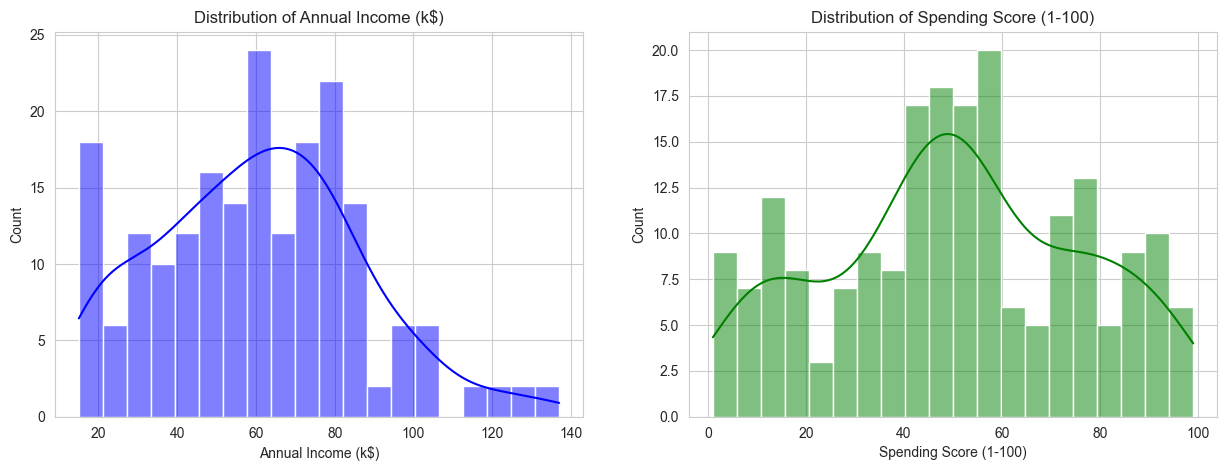

In [6]:
# Set the style of the plots
sns.set_style('whitegrid')

# Create subplots to visualize the distributions of 'Annual Income (k$)' and 'Spending Score (1-100)'
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution plot for 'Annual Income (k$)'
sns.histplot(data['Annual Income (k$)'], bins=20, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribution of Annual Income (k$)')

# Distribution plot for 'Spending Score (1-100)'
sns.histplot(data['Spending Score (1-100)'], bins=20, kde=True, color='green', ax=axes[1])
axes[1].set_title('Distribution of Spending Score (1-100)')

# Show the plots
plt.show()

## 2. Enhanced Clustering with K-Means

In [7]:
# Select features for clustering
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow method
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

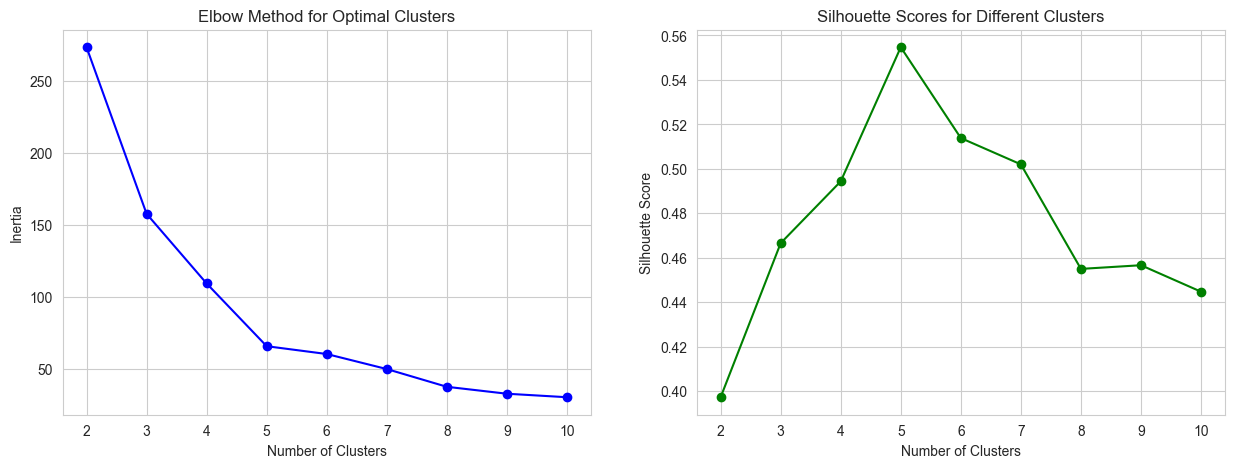

In [8]:
# Plot the Elbow Method and Silhouette Scores
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Elbow method plot
axes[0].plot(cluster_range, inertia, marker='o', color='blue')
axes[0].set_title('Elbow Method for Optimal Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')

# Silhouette score plot
axes[1].plot(cluster_range, silhouette_scores, marker='o', color='green')
axes[1].set_title('Silhouette Scores for Different Clusters')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')

plt.show()

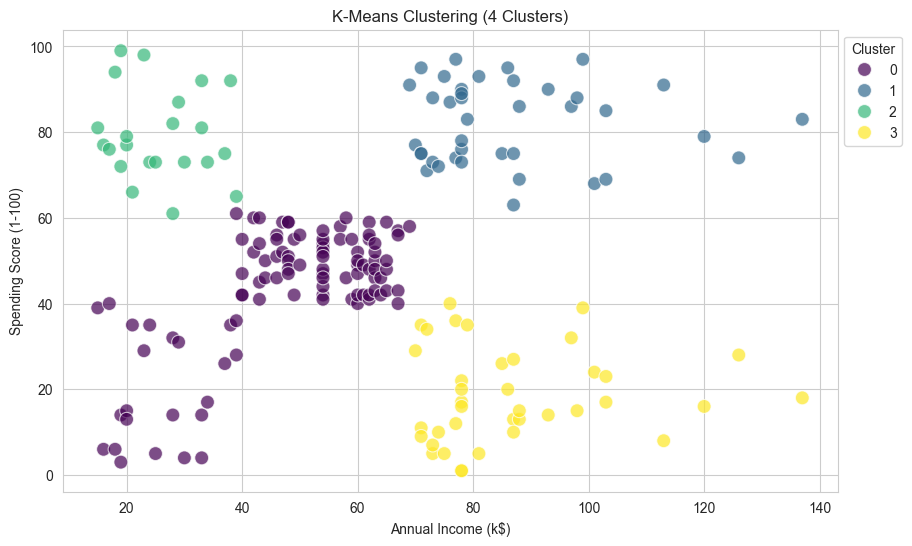

In [9]:
# Apply KMeans with the optimal number of clusters (4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_data)

# Add the cluster labels to the original dataframe
data['KMeans_Cluster'] = kmeans.labels_

# Visualize the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['Annual Income (k$)'], 
    y=data['Spending Score (1-100)'], 
    hue=data['KMeans_Cluster'], 
    palette='viridis', 
    s=100, 
    alpha=0.7
)

plt.title('K-Means Clustering (4 Clusters)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster', bbox_to_anchor=(1, 1))
plt.show()

## 3. Advanced Implementation of Hierarchical Clustering

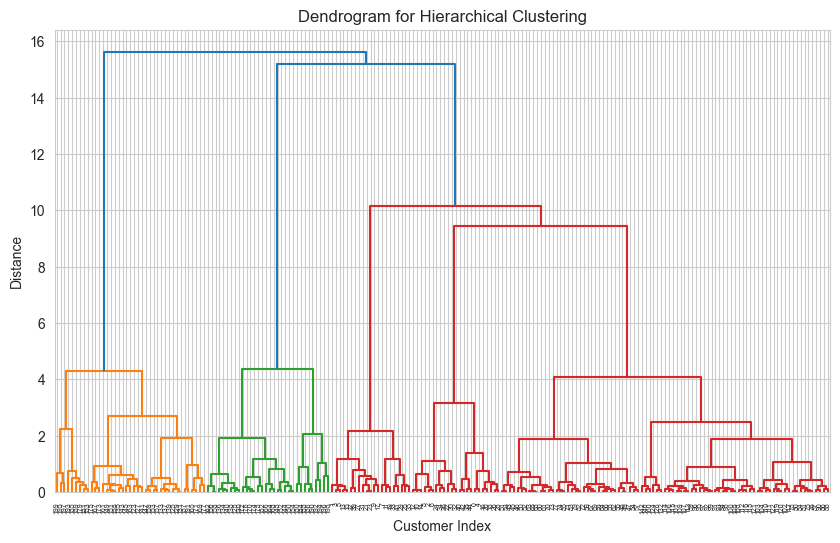

In [10]:

# Perform hierarchical clustering and plot the dendrogram
Z = linkage(scaled_data, 'ward')
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

## 4. Comprehensive Cluster Analysis

In [12]:
kmeans_clusters = data.groupby('KMeans_Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Print the characteristics of each cluster
print("Characteristics of KMeans Clusters")
print(kmeans_clusters)

# Calculate Silhouette Score for KMeans clustering
silhouette_avg = silhouette_score(scaled_data, data['KMeans_Cluster'])
print(f'Silhouette Score for KMeans Clustering: {silhouette_avg}')

Characteristics of KMeans Clusters
                Annual Income (k$)  Spending Score (1-100)
KMeans_Cluster                                            
0                        48.168317               43.396040
1                        86.538462               82.128205
2                        25.727273               79.363636
3                        87.000000               18.631579
Silhouette Score for KMeans Clustering: 0.49434988482196784


## 5. Insightful Reporting and Visualization

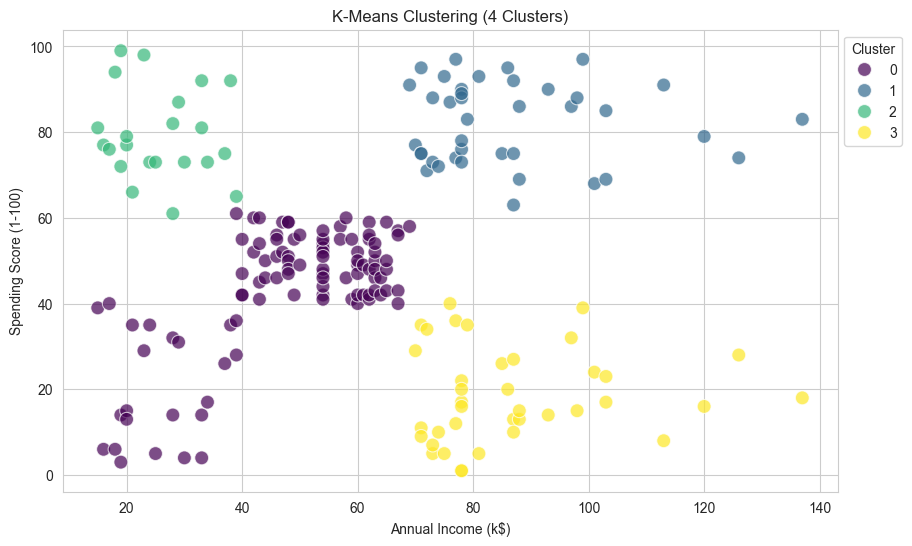

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['Annual Income (k$)'], 
    y=data['Spending Score (1-100)'], 
    hue=data['KMeans_Cluster'], 
    palette='viridis', 
    s=100, 
    alpha=0.7
)

plt.title('K-Means Clustering (4 Clusters)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster', bbox_to_anchor=(1, 1))
plt.show()

In [14]:
# Final cluster summary
print("Summary of clustering results and business insights")
print("1. Identified distinct customer groups based on income and spending habits.")
print("2. Business can target these clusters for tailored marketing strategies.")
print("3. KMeans provided 4 clear customer segments, which can be used for personalization.")

Summary of clustering results and business insights
1. Identified distinct customer groups based on income and spending habits.
2. Business can target these clusters for tailored marketing strategies.
3. KMeans provided 4 clear customer segments, which can be used for personalization.
